# Trabalho Prático 2 - Introdução a Inteligência Artificial (UFMG - 2023/2)
Aluno: Henrique Soares Assumpção e Silva

Matrícula: 2020006620

## Introdução

O segundo trabalho prático da disciplina de Introdução a Inteligência Artificial consiste na implementação de dois algoritmos de aprendizado: K-Nearest Neighbors e K-Means. O objetivo é testar a implementação dos modelos com os dados NBA Rookie Stats, que contém dados de jogadores novatos da NBA. O dataset possui $1340$ amostras, com $19$ atributos e uma variável alvo binária que informa se a carreira do jogador durou pelo menos cinco anos. O objetivo no contexto supervisionado é realizar classificação de acordo com tal variável, e o objetivo no contexto não-supervisionado é encontrar clusters de jogadores com características semelhantes.

### Dependências

In [1]:
INSTALL_DEPENDENCIES = False # COLOCAR COMO TRUE SE QUISER INSTALAR OS PACOTES QUE SÃO UTILIZADOS

if INSTALL_DEPENDENCIES:
    !pip install -r requirements.txt

### Carregando os dados

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
DATA_PATH = './data/' # Caminho para o diretório com os arquivos .csv (ALTERE CASO O CAMINHO SEJA DIFERENTE)

train_data = pd.read_csv(DATA_PATH + 'nba_treino.csv')
test_data = pd.read_csv(DATA_PATH + 'nba_teste.csv')
print(f"Train shape = {train_data.shape}\nTest shape = {test_data.shape}")

Train shape = (1072, 20)
Test shape = (268, 20)


In [4]:
train_data

,GP,MIN,PTS,FGM,FGA,FG%,3PMade,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,1.2,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1068,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,0.8,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1069,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,1.0,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1070,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,1.2,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [5]:
test_data

,GP,MIN,PTS,FGM,FGA,FG%,3PMade,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,40,6.7,3.6,1.2,3.0,39.8,0.1,0.6,13.6,1.1,1.5,77.6,0.5,0.8,1.2,0.4,0.3,0.1,0.6,1
1,27,6.6,1.3,0.6,1.3,47.2,0.0,0.0,0.0,0.1,0.3,28.6,0.6,1.4,2.0,0.2,0.2,0.6,0.3,1
2,44,6.4,2.4,1.0,1.9,53.7,0.0,0.0,0.0,0.4,0.7,50.0,0.4,1.0,1.4,0.2,0.2,0.4,0.6,1
3,49,5.3,2.1,0.7,1.9,37.6,0.0,0.0,0.0,0.7,1.1,64.2,0.5,0.7,1.2,0.2,0.3,0.2,0.5,0
4,82,37.2,19.2,7.5,15.3,49.0,0.1,0.3,22.7,4.1,5.0,82.9,3.9,7.0,11.0,3.6,1.0,0.6,1.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,82,27.9,9.8,4.2,9.8,43.3,0.0,0.0,0.0,1.4,2.1,65.1,2.2,4.0,6.2,1.1,0.7,0.9,1.7,1
264,56,19.1,5.6,2.2,4.6,47.5,0.0,0.1,0.0,1.3,1.8,71.0,1.3,3.7,4.9,2.1,0.7,1.8,1.9,1
265,82,18.9,6.6,2.3,4.6,50.0,0.0,0.0,0.0,2.0,2.9,70.0,2.1,3.2,5.3,1.0,0.7,0.2,1.2,1
266,50,16.3,5.4,2.2,5.0,43.8,0.1,0.4,31.6,0.9,1.1,79.6,0.3,0.9,1.1,1.7,0.4,0.1,0.9,1


## Modelagem e Experimentos

O programa foi desenvolvido na linguagem Python, no sistema operacional Windows 11, utilizando o sistema WSL de Linux. O programa foi implementado e compilado em uma máquina com 16GB de RAM em um processador Intel Core I5-9400F.

Para as proximas seções, considere que $X \in M_{n\times d}(\mathbb{R})$ é uma matriz $n \times d$ pertencente à álgebra de matrizes sobre o corpo dos reais, onde $n$ represente o número de amostras do conjunto de dados, e $d$ o número de atributos. Assumimos que cada linha da matriz $X$ representa um vetor em $\mathbb{R}^d$, e iremos denotar por $x_i$ a $i$-ésima linha de $X$. No contexto de aprendizado supervisionado, assumimos a existência de um vetor $y \in \mathbb{R}^n$ onde cada entrada representa o rótulo da $i$-ésima amostra, isto é, $y_i$ represente o rótulo do vetor $x_i$.

### Funções Comuns
Implementações das funções que serão utilizadas em ambos os algoritmos, bem como as funções de avaliação.

In [6]:
# Funções de avaliação
def accuracy(y_true:np.ndarray,y_pred:np.ndarray)->float:
    """
    Função que computa a acurácia.
    Inputs:
      y_true: array numpy com os rótulos corretos.
      y_pred: array numpy com os rótulos dados pelo modelo.
    Returns:
      acurácia do modelo, i.e., (quantidade de elementos preditos corretamente)/(quantidade de elementos total).
    """
    correct_preds_ids = np.where(y_true == y_pred)[0]
    return len(correct_preds_ids)/len(y_true)

def precision(y_true:np.ndarray,y_pred:np.ndarray)->float:
    """
    Função que computa a precisão.
    Inputs:
      y_true: array numpy com os rótulos corretos.
      y_pred: array numpy com os rótulos dados pelo modelo.
    Returns:
      precisão do modelo, i.e., (quantidade de verdadeiros positivos)/(quantidade de positivos preditos pelo modelo).
    """
    pos_ids = np.where(y_true == 1)[0]
    pos_ids_pred = np.where(y_pred == 1)[0]
    true_pos_ids = np.where(y_true[pos_ids] == y_pred[pos_ids])[0]
    return len(true_pos_ids)/len(pos_ids_pred)

def recall(y_true:np.ndarray,y_pred:np.ndarray)->float:
    """
    Função que computa o recall.
    Inputs:
      y_true: array numpy com os rótulos corretos.
      y_pred: array numpy com os rótulos dados pelo modelo.
    Returns:
      recall do modelo, i.e., (quantidade de verdadeiros positivos)/(quantidade de positivos reais).
    """
    pos_ids = np.where(y_true == 1)[0]
    true_pos_ids = np.where(y_true[pos_ids] == y_pred[pos_ids])[0]
    return len(true_pos_ids)/len(pos_ids)

def f1(y_true:np.ndarray,y_pred:np.ndarray)->float:
    """
    Função que computa o score F1.
    Inputs:
      y_true: array numpy com os rótulos corretos.
      y_pred: array numpy com os rótulos dados pelo modelo.
    Returns:
      F1 score do modelo, i.e., (2*Recall*Precision)/(Recall+Precision)
    """
    prec = precision(y_true,y_pred)
    rec = recall(y_true,y_pred)
    return (2*prec*rec)/(prec+rec)

def confusion_matrix(y_true:np.ndarray,y_pred:np.ndarray)->np.ndarray:
    """
    Função que computa o score F1.
    Inputs:
      y_true: array numpy com os rótulos corretos.
      y_pred: array numpy com os rótulos dados pelo modelo.
    Returns:
      matriz de confusão contendo os verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos
    """
    c_matrix = np.zeros([2,2])
    
    neg_ids = np.where(y_true == 0)[0]
    true_neg_ids = np.where(y_true[neg_ids] == y_pred[neg_ids])[0]
    false_pos_ids = np.where(y_true[neg_ids] != y_pred[neg_ids])[0]
    
    pos_ids = np.where(y_true == 1)[0]
    true_pos_ids = np.where(y_true[pos_ids] == y_pred[pos_ids])[0]
    false_neg_ids = np.where(y_true[pos_ids] != y_pred[pos_ids])[0]
    
    c_matrix[0,0] = len(true_neg_ids)
    c_matrix[0,1] = len(false_pos_ids)
    c_matrix[1,0] = len(false_neg_ids)
    c_matrix[1,1] = len(true_pos_ids)
    return c_matrix

In [7]:
# Funções de cálculo de distância entre pontos
def euclidean_dists(x1:np.ndarray,X:np.ndarray) -> float:
    """
    Função que computa a distância euclidiana (norma l^2 da diferença) entre um vetor x1 e um conjunto de vetores X.
    Assume-se que a matriz X contém vetores em cada linha, i.e., cada linha representa um vetor distinto ao qual deseja-se computar a distância.
    Inputs:
      x1: array numpy representando um vetor
      X: array numpy representando uma matriz onde cada linha é um vetor
    Outputs:
      array numpy onde a i-ésima entrada representa a distância euclidiana entre x1 e o i-ésimo vetor de X (i-ésima linha)
    """
    broadcast_diff = x1.reshape(1,-1) - X # Diferença utilizando o broadcast do numpy
    squared_dist = np.diag(broadcast_diff@broadcast_diff.T) # Calcula os produtos internos e recupera os elementos diagonais (normas ao quadrado)
    return np.sqrt(squared_dist) 
    
def distance_matrix(X1:np.ndarray,X2:np.ndarray) -> np.ndarray:
    """
    Função que computa a matriz de distâncias euclidianas entre duas matrizes X1 e X2.
    Inputs:
      X1: array numpy representando uma matriz onde cada linha é um vetor
      X2: array numpy representando uma matriz onde cada linha é um vetor
    Outputs:
      array numpy onde a entrada ij representa a distância euclidiana entre a i-ésima linha de X1 e a j-ésima linha de X2
    
    """
    # Nesse caso a matriz não será necessariamente simétrica, então fazemos por força bruta, i.e., calculamos as distâncias para cada linha de X1 w.r.t. X2
    dist_matrix = np.zeros([len(X1),len(X2)])
    for row in range(len(X1)):
        dists = euclidean_dists(X1[row,:],X2)
        dist_matrix[row,:] = dists

    return dist_matrix

### K-Nearest Neighbors
O algoritmo K-Nearest Neighbors (KNN) é um algoritmo clássico de aprendizado supervisionado, e nesta seção iremos brevemente descrever seu funcionamento. O algoritmo KNN é parametrizado por uma constante $K$ que define a quantidade de vizinhos a serem considerados, e ele procede da seguinte forma:
* Para cada $x_i$, calcule a distância euclidiana entre tal ponto e os demais pontos $x_j$.
* Encontre os $K$ vizinhos mais próximos segundo a métrica euclidiana.
* O rótulo atribuído a $x_i$ será dado pelo rótulo mais comum dentre os $K$ vizinhos mais próximos.

Dentro do contexto de aprendizado supervisionado, primeiro define-se um conjunto de treino, que nada mais é do que um subconjunto do conjunto total de dados, e um conjunto de teste, que será utilizado para avaliar a capacidade de generalização do modelo. A classificação do KNN funciona então da seguinte maneira: para cada ponto do conjunto de teste, realizamos os passos $1,2,3$ previamente descritos, ou seja, calculamos os $K$ vizinhos mais próximos dentre os pontos do conjunto de treino para cada novo ponto do conjunto de teste, e então realizamos a classificação.

In [8]:
# Ref: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
def knn_predict(X:np.ndarray,k:int,dist_matrix:np.ndarray,tgt_labels:np.ndarray) -> np.ndarray:
    """
    Função que faz a predição do algoritmo KNN.
    Inputs:
      X: array numpy representando uma matriz, onde cada linha é um ponto.
      k: valor inteiro representando a quantidade de vizinhos a ser considerada no algoritmo
      dist_matrix: matriz com as distâncias entre X e os dados de treino.
      tgt_labels: matriz com as labels dos dados de treino.
    Outputs:
      array numpy com as labels previstas pelo algoritmo
    """
    # Encontra os ids dos k vizinhos mais próximos, e então encontra os seus labels
    nearest_neigh_ids = np.argpartition(dist_matrix,k,axis=1)[:,:k]
    nearest_neigh_labels = tgt_labels[nearest_neigh_ids]
    # Atribui ao i-ésimo ponto a label correspondente a maioria das labels dos k vizinhos mais próximos
    predicted_labels = np.round(nearest_neigh_labels.sum(axis=1)/k)

    return predicted_labels

#### Experimentos de Aprendizado Supervisionado
A tarefa de aprendizado supervisionado consiste em classificar os jogadores quanto a uma variável booleana que indica se as suas carreiras duraram ao menos cinco anos. Para isso, realizamos um split $80/20$ em conjuntos de treino e teste, respectivamente, e executamos o algoritmo KNN para $K \in \{2,5,10,25,50,100,125,150,200\}$. As métricas de performance utilizadas serão: acurácia, precisão, recall, F1 score e as matrizes de confusão. Também iremos comparar nosso modelo com a implementação do sklearn.

In [9]:
# Conversão dos dados para numpy
X_train = train_data.iloc[:,:-1].to_numpy()
y_train = train_data.iloc[:,-1].to_numpy()

X_test = test_data.iloc[:,:-1].to_numpy()
y_test = test_data.iloc[:,-1].to_numpy()

# Pré-calculamos a matriz de distâncias dos dados de teste para os dados de treino
dist_matrix = distance_matrix(X_test,X_train) 

In [10]:
# Imports do sklearn para comparação
from sklearn.neighbors import KNeighborsClassifier

results = []
results_sklrn = []

confusions = []
confusions_sklrn = []

k_values = [2,5,10,25,50,100,125,150,200]

for k in k_values:
    # Nosso modelo. Note que passamos como parâmetros da função os dados de TESTE, a matriz de distância entre cada ponto de TESTE para cada ponto
    # de TREINO, e os rótulos de TREINO, pois queremos atribuir um rótulo para um ponto de TESTE dado seus vizinhos mais próximos do conjunto de TREINO
    y_pred = knn_predict(X_test,k,dist_matrix,y_train)

    results.append([k,accuracy(y_test,y_pred),precision(y_test,y_pred),recall(y_test,y_pred),f1(y_test,y_pred)])
    confusions.append(confusion_matrix(y_test,y_pred))

    # Scikit-learn
    sklrn_knn = KNeighborsClassifier(n_neighbors=k,algorithm="brute")
    sklrn_knn.fit(X_train,y_train)
    y_pred_sk = sklrn_knn.predict(X_test)
    
    results_sklrn.append([accuracy(y_test,y_pred_sk),precision(y_test,y_pred_sk),recall(y_test,y_pred_sk),f1(y_test,y_pred_sk)])
    confusions_sklrn.append(confusion_matrix(y_test,y_pred_sk))

A tabela abaixo mostra os resultados w.r.t. Acurácia (Acc), Precisão (Prec), Recall (Rec) e F1 score para o nosso modelo e para o modelo do sklearn.

In [11]:
# Tabela de resultados finais
ours_results_df = pd.DataFrame(results,columns=[('nosso','K'),('nosso','Acc'),('nosso','Prec'),('nosso','Rec'),('nosso','F1')])
sklrn_results_df = pd.DataFrame(results_sklrn,columns=[('scikit-learn','Acc'),('scikit-learn','Prec'),('scikit-learn','Rec'),('scikit-learn','F1')])

results_df = pd.concat([ours_results_df,sklrn_results_df],axis=1)
results_df.columns = pd.MultiIndex.from_tuples(results_df.columns,names=['Modelo','Métricas'])
results_df.set_index(('nosso','K'),inplace=True)
results_df.index.rename('K',inplace=True)
results_df.round(4)

Modelo     nosso                         scikit-learn                        
Métricas     Acc    Prec     Rec      F1          Acc    Prec     Rec      F1
K                                                                            
2         0.5522  0.7353  0.4464  0.5556       0.5522  0.7353  0.4464  0.5556
5         0.6306  0.6994  0.7202  0.7097       0.6343  0.7035  0.7202  0.7118
10        0.6306  0.7255  0.6607  0.6916       0.6306  0.7255  0.6607  0.6916
25        0.6567  0.7209  0.7381  0.7294       0.6567  0.7209  0.7381  0.7294
50        0.6716  0.7326  0.7500  0.7412       0.6716  0.7326  0.7500  0.7412
100       0.6903  0.7485  0.7619  0.7552       0.6903  0.7485  0.7619  0.7552
125       0.6978  0.7486  0.7798  0.7638       0.6940  0.7471  0.7738  0.7602
150       0.6866  0.7442  0.7619  0.7529       0.6866  0.7442  0.7619  0.7529
200       0.6754  0.7263  0.7738  0.7493       0.6754  0.7263  0.7738  0.7493

Podemos observar que:

* A acurácia aumenta a medida que o valor de $K$ aumenta até o valor 125, após isso ela e as demais métricas diminuem para valores de $K > 125$, algo que pode indicar o início do fenômeno de overfitting nos dados de teste, fazendo com que o erro de generalização do modelo aumente, i.e., a sua variância fica muito alta e o seu viés fica muito baixo. Isso pode indicar que, para o dataset em questão, os valores ideas de $K$ são aqueles entre $50$ e $125$.
* Podemos perceber que a precisão diminui ligeiramente de $K=2$ para $K=5$, o que indica que, apesar da acurácia ter aumentado, a proporção de verdadeiros positivos preditos pelo modelo para o total de positivos preditos pelo modelo diminuiu, i.e., a capacidade do modelo de selecionar elementos relevantes piorou. Uma queda similar ocorre com o recall de $K=5$ para $K=10$, indicando que a proporção de verdadeiros positivos preditos pelo modelo para o total de verdadeiros positivos dos dados diminuiu, i.e., a capacidade de selecionar elementos relevantes do modelo piorou.
* De modo geral, o modelo com $K=125$ apresentou os melhores resultados, em especial ele apresentou o melhor F1 score, i.e., tanto a habilidade do modelo de prever corretamente elementos positivos dos dados quanto sua capacidade de selecionar elementos positivos foi a melhor dentre todos os modelos testados.
* Com relação à comparação com o scikit-learn, observamos que os resultados para todas as métricas e valores de $K$ foram extremamente próximos. Salvo algumas exceções, boa parte dos resultados coincidem com precisão de $4$ casas decimais. Isso nos mostra que nossa implementação do KNN é extremamente parecida em termos de performance com a implementação do scikit-learn. Por outro lado, a implementação do scikit-learn é significativamente mais rápida e não depende de uma pré-computação de uma matriz de distâncias. Isso é esperado, tendo em vista que o scikit-learn é uma biblioteca extremamente otimizada e com anos de desenvolvimento, portanto, de modo geral, a comparação do nosso modelo foi extremamente satisfatória e nos mostra que a nossa implementação está de fato correta levando em conta o dataset em questão.

Agora iremos analisar as matrizes de confusão do nosso modelo para os dados valores de $K$, e também compará-las à matriz de confusão do modelo do sklearn.

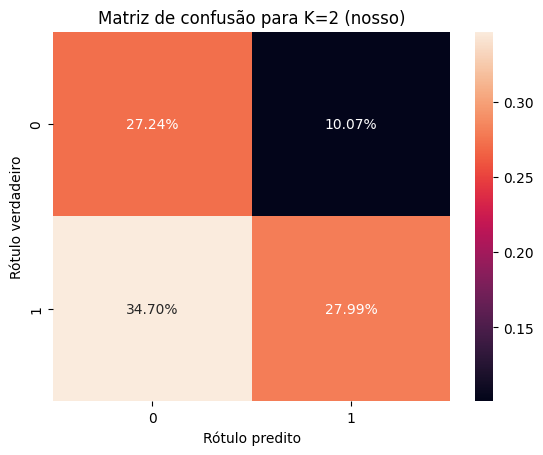

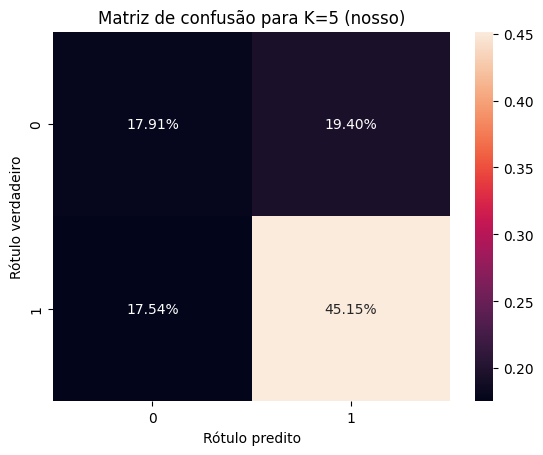

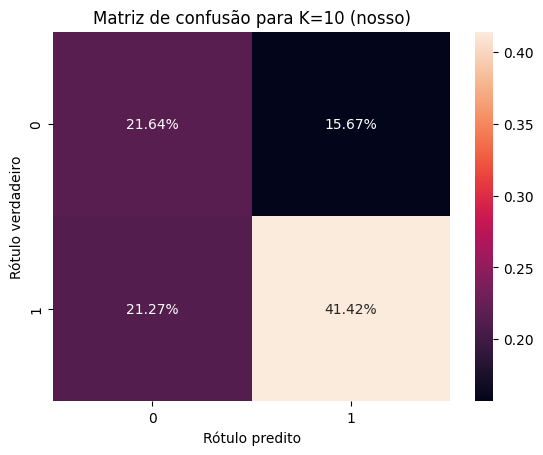

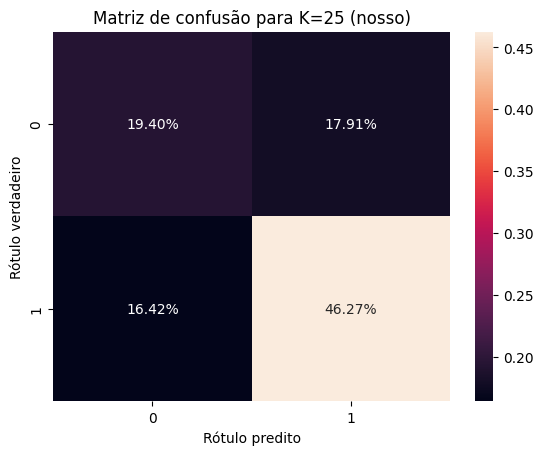

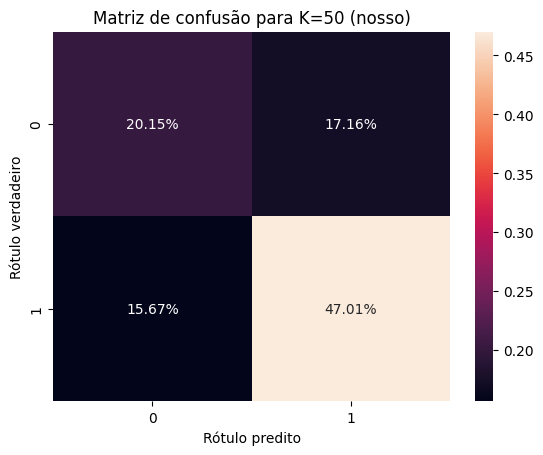

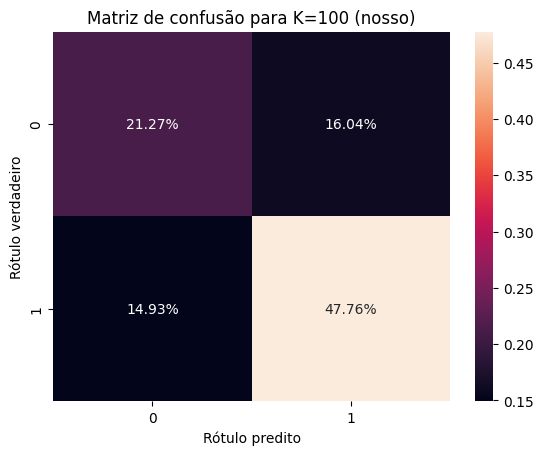

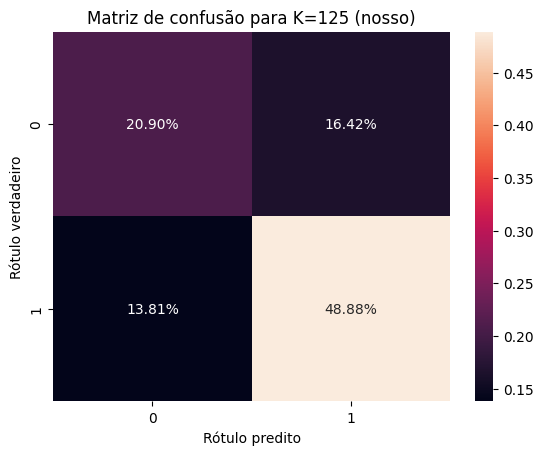

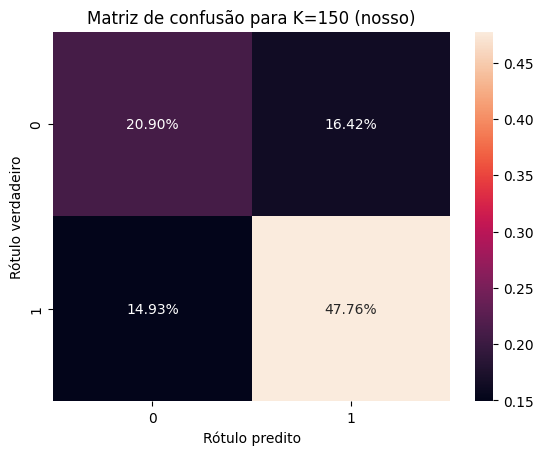

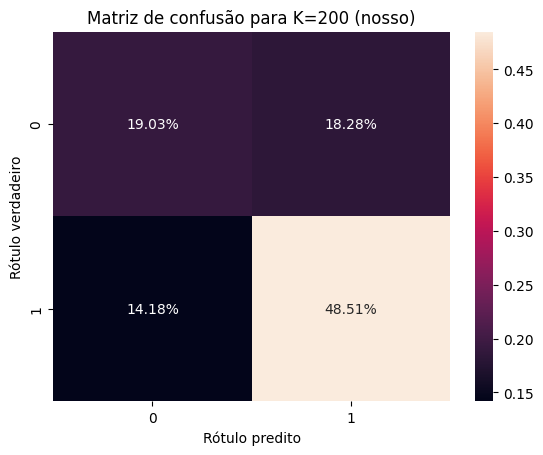

In [12]:
for i in range(len(confusions)):
    fig, ax = plt.subplots()
    ax.set_title(f"Matriz de confusão para K={k_values[i]} (nosso)")
    labels = ['True Neg','False Pos','False Neg','True Pos']
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(confusions[i]/np.sum(confusions[i]),annot=True,fmt='.2%',ax=ax)
    ax.set(xlabel='Rótulo predito',ylabel='Rótulo verdadeiro')
    plt.show()

A evolução das matrizes de confusão nos mostram precisamente o comportamento esperado após a análise prévia das métricas: a quantidade de verdadeiros positivos e negativos aumenta a medida que $K$ aumenta até $125$, e a quantidade de falsos positivos e negativos diminui.

Note que o número de falsos negativos aumentou quando aumentamos o valor de $K$ de $125$ para $150$, i.e., o modelo passou a classificar mais instâncias como negativas de maneira incorreta, mostrando que de fato o modelo piorou com esse aumento no valor de $K$.

De modo geral, a matriz de confusão também nos mostra que, em termos de erros, nosso modelo aparenta errar mais no quesito falso positivo, i.e., ele aparenta possuir uma tendência a classificar mais indivíduos como positivos (carreiras que duraram por mais de 5 anos) do que como negativos. Isso é um comportamento que é esperado dado a simplicidade do modelo e a natureza dos dados: $62$% dos rótulos são positivos, ou seja, a maioria dos jogadores no dataset teve uma carreira que durou por mais de cinco anos, portanto faz sentido que o modelo tenda a classificar mais indivíduos com o rótulo positivo.

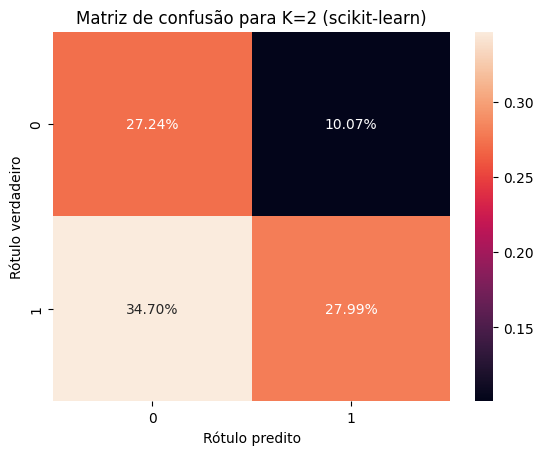

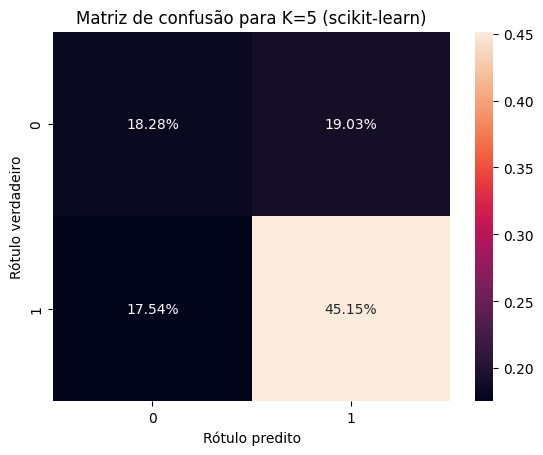

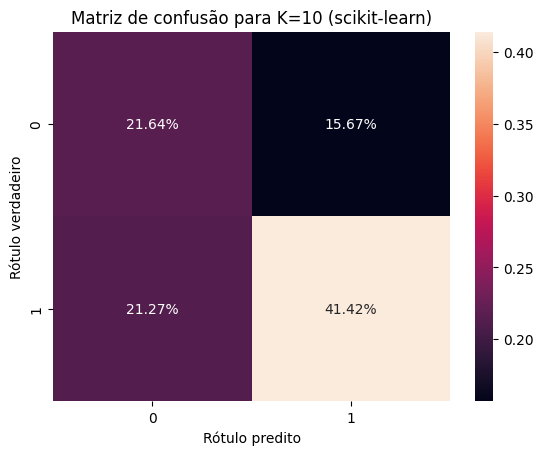

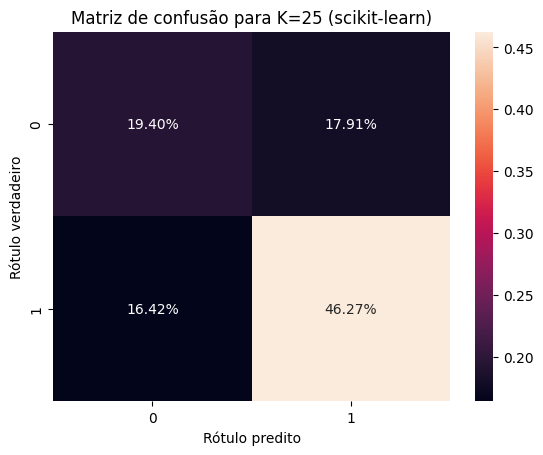

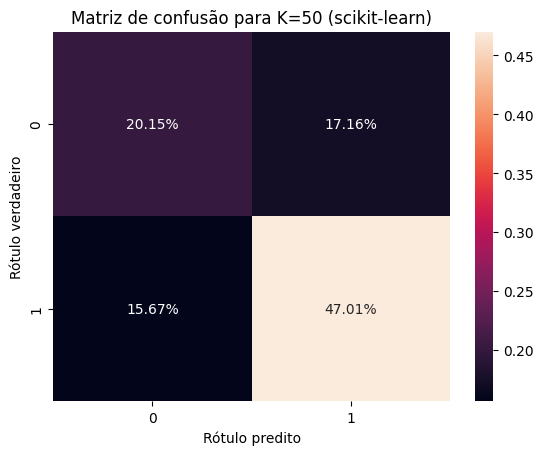

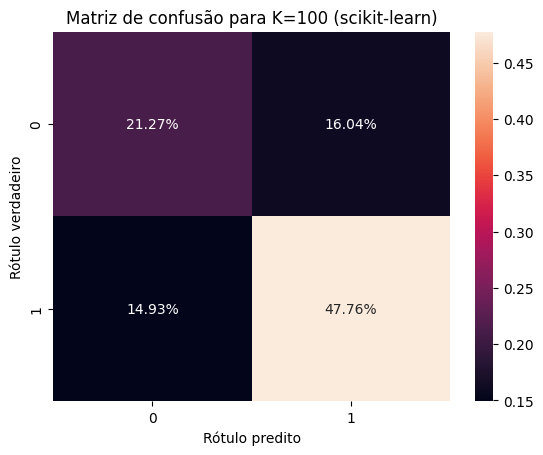

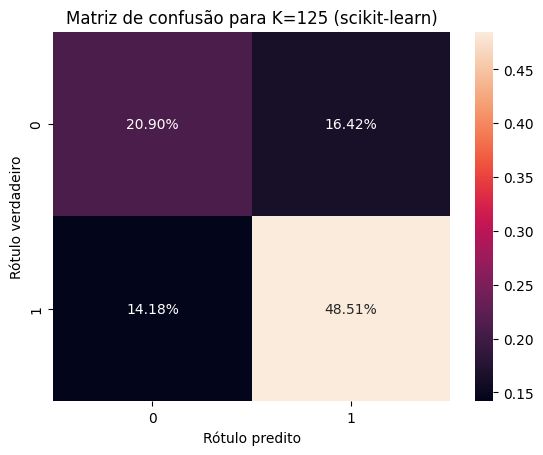

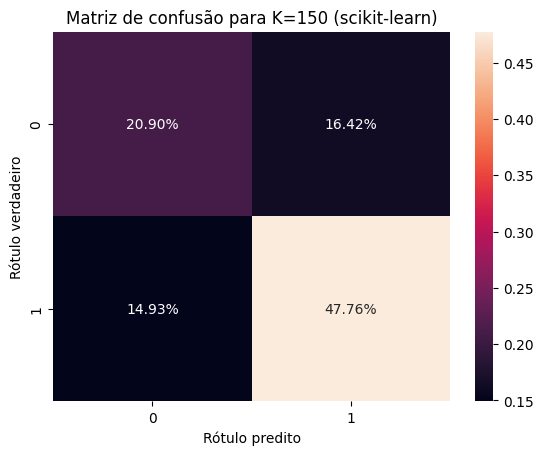

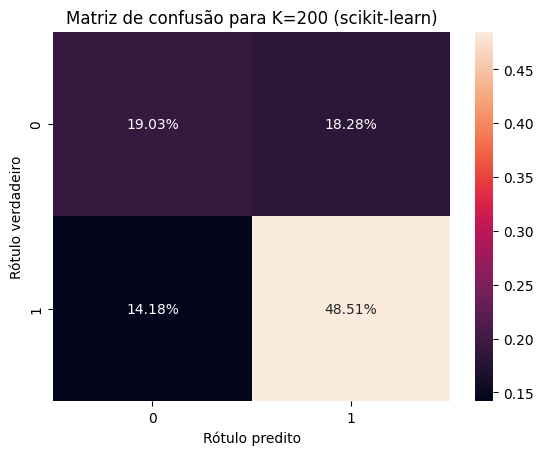

In [13]:
for i in range(len(confusions_sklrn)):
    fig, ax = plt.subplots()
    ax.set_title(f"Matriz de confusão para K={k_values[i]} (scikit-learn)")
    labels = ['True Neg','False Pos','False Neg','True Pos']
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(confusions_sklrn[i]/np.sum(confusions_sklrn[i]),annot=True,fmt='.2%',ax=ax)
    ax.set(xlabel='Rótulo predito',ylabel='Rótulo verdadeiro')
    plt.show()

Com relação a comparação com o sklearn, observamos que as matrizes de confusão são as mesmas com até duas casas decimais de precisão, algo que reforça a similaridade entre a performance do nosso modelo e o do scikit-learn.

### KMeans
O algoritmo K-Means é um algoritmo clássico de aprendizado não-supervisionado, e nesta seção iremos descrever brevemente seu funcionamento. Neste trabalho, optamos por implementar a versão clássica do algoritmo K-Means, conhecida como algoritmo de Lloyd. O K-Means depende de uma constante $k$ que determina a quantidade de centroides a serem calculados, e também depende de um número máximo de iterações e de uma constante de tolerância, e ele funciona da seguinte forma:
1. Escolhe-se $k$ pontos aleatoriamente dentre os $n$ pontos disponíveis para serem os centros dos clusters (centroides) iniciais. Para cada um dos demais pontos, o atribui ao cluster que possui centro mais próximo segundo a métrica euclidiana. Esse processo de inicialização é conhecido como Partição aleatória.
2. Para cada um dos $k$ clusters, calcula-se novos centros da seguinte forma: dado todos os pontos $x_i$ em um cluster $j, j \in \{1,2,...,k\}$, o novo centro $c_j$ será dado pela média aritmética dos pontos $x_i$.
3. Atualiza-se os clusters da seguinte forma: para cada ponto, o atribui para o cluster que possui centro mais próximo.
4. Repete-se os passos $2,3$ até que o número máximo de iterações seja realizado, ou até que a norma da diferença entre os novos centros e os da iteração anterior seja menor que a constante de tolerância definida.

O algoritmo K-Means busca dividir os dados em $k$ clusters (centróides), mas não existe garantia de otimalidade da solução, portanto a qualidade dos clusters pode variar significativamente a depender dos $k$ pontos escolhidos inicialmente e também da quantidade de iterações e da constante de tolerância

In [14]:
# Ref: https://en.wikipedia.org/wiki/K-means_clustering
def kmeans_update(X:np.ndarray,point_labels:np.ndarray,centroids:np.ndarray) -> np.ndarray:
    """
    Função que faz o passo de update do KMeans de acordo com o algoritmo de Lloyd.
    Inputs:
      X: array numpy representando uma matriz, onde cada linha é um ponto.
      point_labels: array numpy com os labels de cada ponto, i.e., informando em qual centróide cada ponto está.
      centroids: array numpy representando uma matriz, onde a i-ésima linha é o centro do i-ésimo centroíde.
    Outputs:
      array numpy com os centros dos centroides atualizados.
    """
    # Para cada centróide, o atualiza o seu centro de acordo com a média de todos os pontos que estão nele
    new_centroids = centroids.copy()
    for k in range(len(centroids)):
        ids = np.where(point_labels == k)[0]
        if(len(ids) != 0):
            curr_cluster = X[ids,:]
            new_centroids[k,:] = curr_cluster.mean(axis=0)
    return new_centroids
    
def kmeans_assign(X:np.ndarray,centroids:np.ndarray) -> np.ndarray:
    """
    Função que faz o passo de assign do KMeans de acordo com o algoritmo de Lloyd.
    Inputs:
      X: array numpy representando uma matriz, onde cada linha é um ponto.
      centroids: array numpy representando uma matriz, onde a i-ésima linha é o centro do i-ésimo centroíde.
    Outputs:
      array numpy com os labels de cada ponto, i.e., informando em qual centróide cada ponto está.
    """
    # Calcula a distância de cada ponto para os centroides, e então atribui o centróide mais próximo para cada ponto
    dist_matrix = distance_matrix(X,centroids)
    point_labels = np.argmin(dist_matrix,axis=1)
    return point_labels
    
def kmeans_clustering(X:np.ndarray,n_centroids:int,max_iter:int=300,tol:float=1e-4,seed:int=None) -> tuple:
    """
    Função que executa o KMeans segundo o algoritmo de Floyd. Utiliza o método Random Partition para inicializar.
    Inputs:
      X: array numpy representando uma matriz, onde cada linha é um ponto.
      n_centroids: número de centroides que serão utilizados.
      max_iter: número máximo de iterações permitido
      tol: tolerância para interromper o algoritmo, i.e., se a distância euclidiana entre os novos centroides 
      e os anteriores for menor do que tol, o algoritmo é interrompido.
      seed: semente aleatória opcional para controlar o Random Partition
    Outputs:
      array numpy com os centroides, array numpy com as labels de cada ponto
    """
    centroids = np.zeros([n_centroids,X.shape[1]])
    # Método Random Partition: assinala um cluster aleatório para cada ponto, e então calcula os centroides iniciais a partir dessa inicialização
    if isinstance(seed,int):
        np.random.seed(seed)
    point_labels = np.random.randint(n_centroids,size=len(X))
    centroids = kmeans_update(X,point_labels,centroids)
    # Loop principal do algoritmo
    for iter in range(max_iter):
        point_labels = kmeans_assign(X,centroids)
        new_centroids = kmeans_update(X,point_labels,centroids)

        # Checa por convergência
        centroid_diff = new_centroids - centroids
        centroid_dist = np.sqrt(np.diag(centroid_diff@centroid_diff.T))
        if((centroid_dist < tol).all()):
            centroids = new_centroids
            break
            
        centroids = new_centroids

    return centroids,point_labels

#### Experimentos de Aprendizado não-supervisionado
A tarefa de aprendizado não-supervisionado consiste em uma tarefa de clusterização: queremos dividir nossos dados em clusters distintos somente com base nos atributos que não são o atributo alvo, i.e., o atributo com os rótulos. Para isso, iremos utilizar o algoritmo KMeans no dataset completo (treino + teste) com todos os atributos que não a coluna TARGET_5Yrs. Iremos testar os modelos para valores de $K \in \{2,3\}$, e então avaliar a qualidade dos clusters com base em algumas métricas padrão para tarefas deste tipo, e também iremos comparar nossa implementação com a implementação do sklearn.

In [15]:
# Concatenamos os dados tendo em vista que o aprendizado é não-supervisionado, i.e., não fazemos o split entre treino e teste
X = np.concatenate([X_train,X_test],axis=0)
y = np.concatenate([y_train,y_test])

In [16]:
# Import do sklearn para comparação
from sklearn.cluster import KMeans

centroids = []
pred_labels = []

centroids_sklearn = []
pred_labels_sklearn = []


k_values = [2,3]
seed = 2023
for k in k_values:
    # Nosso modelo
    curr_centroids,curr_labels = kmeans_clustering(X,n_centroids=k,max_iter=300,tol=1e-4,seed=seed)
    centroids.append(curr_centroids)
    pred_labels.append(curr_labels)

    # Sklearn
    kmeans_sklearn = KMeans(n_clusters=k,init='random',max_iter=300,tol=1e-4,random_state=seed,n_init=1)
    kmeans_sklearn.fit(X)
    centroids_sklearn.append(kmeans_sklearn.cluster_centers_)
    pred_labels_sklearn.append(kmeans_sklearn.labels_)

    

##### Caso $K=2$
Iremos primeiro estudar o caso $K=2$, e comparar nossos resultados com o modelo do sklearn.

In [17]:
print(r"Centros dos clusters obtidos para $K=2$ do nosso modelo:")
print(centroids[0])
print("\n")
print(r"Centros dos clusters obtidos para $K=2$ do scikit-learn:")
print(centroids_sklearn[0])
print("\n")
# Pegamos apenas a diagonal para recuperar apenas a distância entre os centros equivalentes entre os modelos
centroid_dist = np.diag(distance_matrix(centroids[0],centroids_sklearn[0]))
print(f"Distância entre os centros do nosso modelo e do sklearn:{centroid_dist}")

Centros dos clusters obtidos para $K=2$ do nosso modelo:
[[73.91310345 22.47131034  9.1022069   3.51696552  7.74896552 45.32910345
   0.32468966  0.99310345 21.42606897  1.74606897  2.40496552 72.66041379
   1.26827586  2.60524138  3.87337931  2.09462069  0.79737931  0.46731034
   1.54841379]
 [44.50081301 11.91105691  4.08926829  1.58243902  3.68829268 42.80227642
   0.15674797  0.52699187 16.46601626  0.76910569  1.13463415 67.51804878
   0.70422764  1.34260163  2.04552846  0.90910569  0.40764228  0.25219512
   0.77528455]]


Centros dos clusters obtidos para $K=2$ do scikit-learn:
[[73.91310345 22.47131034  9.1022069   3.51696552  7.74896552 45.32910345
   0.32468966  0.99310345 21.42606897  1.74606897  2.40496552 72.66041379
   1.26827586  2.60524138  3.87337931  2.09462069  0.79737931  0.46731034
   1.54841379]
 [44.50081301 11.91105691  4.08926829  1.58243902  3.68829268 42.80227642
   0.15674797  0.52699187 16.46601626  0.76910569  1.13463415 67.51804878
   0.70422764  1.3426016

Observa-se que os centros são os mesmos para até 12 cases decimais de precisão, ou seja, nossa implementação é extremamente próxima à do sklearn em termos de resultados. Consequentemente, as labels do sklearn são exatamente as mesmas labels que as do nosso modelo. Além disso, em termos de tempo nossa implementação também é semelhante à do sklearn: obviamente a do sklearn é ligeiramente mais rápida, mas nossa implementação não é tão mais lenta.

Uma forma ingênua de avaliar a qualidade de um cluster é utilizando as métricas de avaliação utilizadas na seção anterior. No entanto, precisamos ter cuidado: o label de um cluster é arbitrário, isto é, no caso de dois clusters $C_0,C_1$, o cluster $C_0$ não corresponde necessariamente à label $0$, e o mesmo vale para $C_1$. Portanto, temos a liberdade de atribuir ao cluster a label que maximiza as métricas. A seguir mostramos como fazer isso.

Abaixo seguem as métricas assumindo que o cluster $C_0$ corresponde à label 0 e o cluster $C_1$ corresponde à label 1 para o nosso modelo.

In [18]:
print(f"Acc={accuracy(y,pred_labels[0]):.4f},Prec={precision(y,pred_labels[0]):.4f},Rec={recall(y,pred_labels[0]):.4f},F1={f1(y,pred_labels[0]):.4f}")
print("Matriz de confusão:")
print(confusion_matrix(y,pred_labels[0]))

Acc=0.3179,Prec=0.4325,Rec=0.3201,F1=0.3679
Matriz de confusão:
[[160. 349.]
 [565. 266.]]


Abaixo seguem as métricas assumindo que o cluster $C_0$ corresponde à label 1 e o cluster $C_1$ corresponde à label 0 para o nosso modelo.

In [19]:
# Invertemos as labels fazendo y_pred = 1 - y_pred, i.e., agora o cluster 0 tem a label 1, e o cluster 1 tem a label 0
inverted_labels = 1-pred_labels[0]
print("Métricas assumindo que o cluster 0 corresponde à label 1 e o cluster 1 corresponde à label 0 para o nosso modelo.")
print(f"Acc={accuracy(y,inverted_labels):.4f},Prec={precision(y,inverted_labels):.4f},Rec={recall(y,inverted_labels):.4f},F1={f1(y,inverted_labels):.4f}")
print("Matriz de confusão:")
print(confusion_matrix(y,inverted_labels))

Métricas assumindo que o cluster 0 corresponde à label 1 e o cluster 1 corresponde à label 0 para o nosso modelo.
Acc=0.6821,Prec=0.7793,Rec=0.6799,F1=0.7262
Matriz de confusão:
[[349. 160.]
 [266. 565.]]


Observa-se que, após inverter os labels dos clusters, obtivemos valores para as métricas bem melhores. No entanto, existem formas mais robustas de avaliar a qualidade dos clusters, e note que esse método de avaliação que acabamos de fazer não leva em consideração fatores estruturais sobre os clusters, isto é, o quão homogêneo é cada cluster?

Para responder essa pergunta de maneira correta, iremos utilizar o chamado score de homogeneidade. Esse valor quantifica o quão homogêneo é um cluster: o homogeneity score vale 1 se todos os clusters contém pontos que pertencem somente à uma classe, e quanto menor o valor menos homogêneo são os clusters, i.e., maior a quantidade de pontos que pertencem à classes distintas no mesmo cluster. Essa métrica é interessante pois ela independe de qual label atribuímos a qual cluster: o que importa é a proporção de pontos com labels diferentes em um mesmo cluster.

In [20]:
# Importamos a métrica do sklearn (não iremos implementar essa métrica tendo em vista que ela foge do escopo de implementação do projeto)
from sklearn.metrics import homogeneity_score

print(f"Score de homogeneidade: {homogeneity_score(y,pred_labels[0]):.4f}")
print(f"Score de homogeneidade (labels invertidas): {homogeneity_score(y,1-pred_labels[0]):.4f}")

Score de homogeneidade: 0.0972
Score de homogeneidade (labels invertidas): 0.0972


Note que de fato a métrica independe das labels atribuídas para os clusters. Ademais, observamos que o valor de homogeneidade para nossos clusters é extremamente baixo: isso implica que, do ponto de vista estrutural, a solução do KMeans falha em encontrar clusters que de fato separem os dados de uma maneira satisfatória.

Um último aspecto do KMeans que iremos avaliar para o caso $K=2$ é a variação que o modelo tem com respeito a seed aleatória que determina os pontos iniciais escolhidos como os centros. Iremos avaliar o score de homogeneidade para diferentes valores de seed, para determinar o quao sensível o modelo é as suas condições iniciais.

In [21]:
# Essa célula pode levar alguns segundos para terminar
homogeneity_results = []
for seed in range(100):
    # Nosso modelo
    _,curr_labels = kmeans_clustering(X,n_centroids=2,max_iter=300,tol=1e-4,seed=seed)
    homogeneity_results.append(homogeneity_score(y,curr_labels))

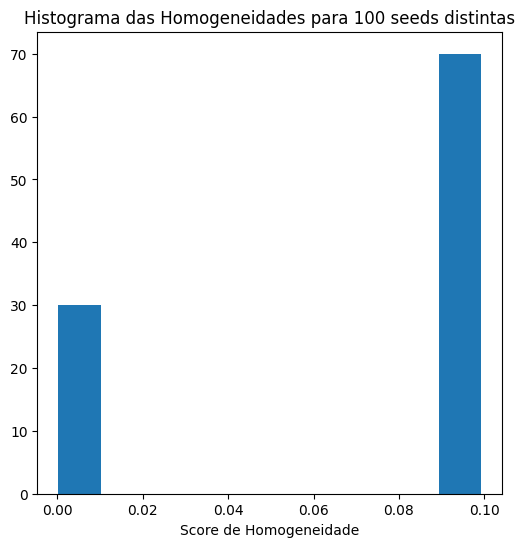

In [22]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_xlabel("Score de Homogeneidade")
ax.set_title("Histograma das Homogeneidades para 100 seeds distintas")
ax.hist(homogeneity_results)
plt.show()

Observa-se que de fato existe uma sensibilidade significativa com respeito à seed inicial, de modo que a depender da seed a homogeneidade se aproxima de zero ou se aproxima de 0.1. De qualquer forma, parece que de modo geral o KMeans não consegue encontrar bons clusters em termos de homogeneidade.

##### Caso $K=3$
Iremos primeiro estudar o caso $K=3$, e comparar nossos resultados com o modelo do sklearn.

In [23]:
print(r"Centros dos clusters obtidos para $K=3$ do nosso modelo:")
print(centroids[1])
print("\n")
print(r"Centros dos clusters obtidos para $K=3$ do scikit-learn:")
print(centroids_sklearn[1])
print("\n")

Centros dos clusters obtidos para $K=3$ do nosso modelo:
[[7.40323232e+01 2.32606061e+01 9.54888889e+00 3.65838384e+00
  8.30141414e+00 4.37387879e+01 4.64646465e-01 1.39939394e+00
  3.02531313e+01 1.77252525e+00 2.36383838e+00 7.48822222e+01
  1.06303030e+00 2.40000000e+00 3.46303030e+00 2.46121212e+00
  8.72121212e-01 3.63838384e-01 1.61272727e+00]
 [4.08779841e+01 1.24259947e+01 4.23209549e+00 1.60132626e+00
  3.95543767e+00 4.00623342e+01 2.68965517e-01 8.72944297e-01
  2.70809019e+01 7.61803714e-01 1.06763926e+00 7.03832891e+01
  5.36074271e-01 1.19177719e+00 1.72413793e+00 1.14907162e+00
  4.56498674e-01 1.70822281e-01 8.15119363e-01]
 [6.17478632e+01 1.58512821e+01 5.96538462e+00 2.36837607e+00
  4.88440171e+00 4.79333333e+01 8.54700855e-04 4.76495726e-02
  1.01645299e+00 1.22713675e+00 1.85641026e+00 6.53871795e+01
  1.33397436e+00 2.30170940e+00 3.63675214e+00 9.10683761e-01
  4.80769231e-01 5.32905983e-01 1.05512821e+00]]


Centros dos clusters obtidos para $K=3$ do scikit-le

Note que, a menos de ordenação, os centros novamente são extremamente próximos (o centro 0 do nosso modelo corresponde ao centro 2 do sklearn, o centro 1 ao centro 0, e o centro 2 ao centro 1). Isso reitera a proximidade em termos de resultados de ambas as implementações. Se reordenarmos de forma correta, obtemos que:

In [24]:
# Pegamos apenas a diagonal para recuperar apenas a distância entre os centros equivalentes entre os modelos
centroid_dist = np.diag(distance_matrix(centroids[1],centroids_sklearn[1][[2,0,1],:]))
print(f"Distância entre os centros do nosso modelo e do sklearn:{centroid_dist}")

Distância entre os centros do nosso modelo e do sklearn:[8.12169879e-14 4.07910655e-14 4.73520965e-14]


No contexto de $K=3$, as métricas de classificação binária não fazem sentido para avaliar a qualidade dos clusters obtidos. No entanto, a métrica de homogeneidade é precisamente o que queremos: podemos avaliar o quão homogêneos cada cluster é para tentar quantificar se houve melhora na qualidade da solução de $K=2$ para $K=3$.

In [25]:
print(f"Score de homogeneidade: {homogeneity_score(y,pred_labels[1]):.4f}")

Score de homogeneidade: 0.0813


O score de homogeneidade aparenta ter piorado para $K=3$, ou seja, aumentar o número de clusters resultou em clusters menos homogêneos. No entanto, devemos fazer a mesma análise de sensibilidade à seed para termos certeza que esse de fato é o caso.

In [26]:
# Essa célula pode levar alguns segundos para terminar
homogeneity_results = []
for seed in range(100):
    # Nosso modelo
    _,curr_labels = kmeans_clustering(X,n_centroids=3,max_iter=300,tol=1e-4,seed=seed)
    homogeneity_results.append(homogeneity_score(y,curr_labels))

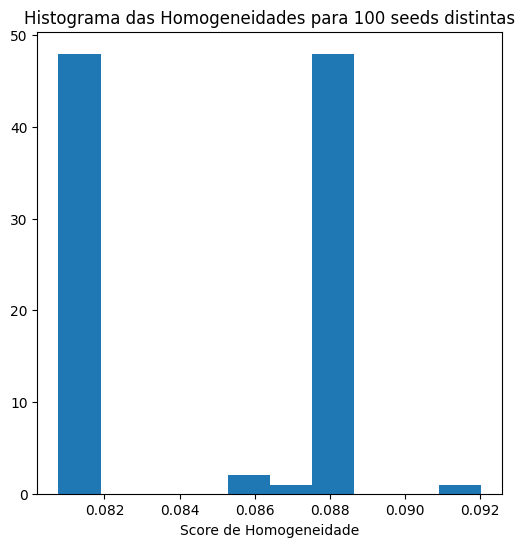

In [27]:
fig,ax = plt.subplots(figsize=(6,6))
ax.set_xlabel("Score de Homogeneidade")
ax.set_title("Histograma das Homogeneidades para 100 seeds distintas")
ax.hist(homogeneity_results)
plt.show()

Os resultados do histograma são extremamente interessantes: apesar do valor máximo de homogeneidade para $K=3$ ser menor do que $K=2$, o algoritmo parece ser bem menos sensível as condições iniciais, e o valor mínimo de homogeneidade é bem maior no caso $K=3$ do que em $K=2$, mostrando que o modelo se tornou mais robusto com mais clusters. No entanto, os valores de homogeneidade ainda são baixos, algo que indica que a clusterização ainda não é possível de maneira satisfatória com somente $3$ clusters.

## Conclusão
A análise experimental feita neste relatório nos permitiu observar o comportamento dos algoritmos KNN e KMeans para o dataset de jogadores de basquete iniciantes da NBA de pontos de vista supervisionado e não-supervisionado.

Os experimentos supervisionados com o KNN nos permitiram concluir que os valores ideais de $K$ se encontram na faixa de $50$ ate $125$, e que valores acima destes podem apresentar overfitting nos dados de treinamento, fazendo com que o erro de generalização aumente, i.e., as métricas para o conjunto de teste ficaram piores. Com relação à comparação com o modelo do sklearn, nota-se que ambas as implementações apresentam resultados extremamente similares, sendo que a única diferença notável é o fato da implementação do sklearn ser significativamente mais eficiente, por motivos evidentes tendo em vista que o scikit-learn é uma biblioteca altamente otimizada.

Os experimentos não-supervisionados com o KMeans nos permitiram concluir que a tarefa de clusterização é extremamente difícil para os valores de $K \in \{2,3\}$. Apesar do caso $K=2$ apresentar métricas relativamente boas, ambos os casos apresentam scores de homogeneidade baixos, ou seja, os clusters encontrados não separam os pontos de maneira satisfatória. O modelo com $K=3$ apresentou uma maior robustez à variações da seed aleatória inicial, apesar de apresentar um valor máximo de homogeneidade menor. Com relação à comparação com o sklearn, ambos os modelos novamente apresentaram resultados extremamente próximos, e também o tempo de execução dos modelos foi parecido.